# 강남 3구는 안전한가?

### 작성 : [PinkWink](http://pinkwink.kr) 

* 강남3구의 주민들이 자신들이 거주하는 구의 체감 안전도를 높게 생각한다는 기사를 확인해 보도록 한다
* 기사 원문 http://news1.kr/articles/?1911504
* 작성 : PinkWink http://pinkwink.kr

* Matplotlib의 heatmap 등을 그릴때 cmap의 디폴트 설정이 변경되어 heatmap 등에서 cmap을 적용할 때 옵션을 잡아주어야 교재와 동일한 효과가 나타난다. (소스코드에 모두 반영됨)
* Folium이 0.4.0으로 판올림 되면서 choropleth 명령에서 geo_str 옵션명이 geo_data 옵션명으로 변경됨. (소스코드에 모두 반영)
* Folium이 0.4.0으로 판올림 되면서 circle marker 적용할때, fill=True 옵션을 반듯이 사용해야 함. (소스코드에 모두 반영)

# 데이터 정리하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv('02. crime_in_Seoul.csv', thousands=',', 
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


* 구글 맵스를 사용해서 경찰서의 위치(위도, 경도) 정보를 받아온다

In [4]:
import googlemaps

In [5]:
gmaps_key = "키 입력" # 자신의 key를 사용합니다.
gmaps = googlemaps.Client(key=gmaps_key)

In [6]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [6]:
station_name = []

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [11]:
station_addreess = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_addreess.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")

    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    print(name + '-->' + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 대조동 통일로 757
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥동 190
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울강서경찰서-->대한민국 서울특별시 양천구 신월동 화곡로 73
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울노원경찰서-->대한민국 서울특별시 노

In [12]:
station_addreess

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥동 190',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [13]:
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718529,
 37.5387099,
 37.5897482,
 37.58506149999999,
 37.550814,
 37.5153176,
 37.5617309,
 37.5130866,
 37.542873,
 37.6128611,
 37.63730390000001,
 37.4568722,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6425238,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [14]:
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9989143,
 126.9659183,
 127.0161353,
 127.0457679,
 126.954028,
 126.905728,
 127.0363806,
 126.9428498,
 127.083821,
 126.9274951,
 127.0273399,
 126.8970429,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0717076,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

In [15]:
gu_name = []

for name in station_addreess:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [16]:
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [17]:
crime_anal_police.loc[crime_anal_police['관서명']=='금천서', ['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [20]:
crime_anal_police.to_csv('02. crime_in_Seoul_include_gu_name.csv',
                         sep=',', encoding='utf-8')

In [19]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


# pandas의 pivot_table 익히기

In [17]:
import pandas as pd
import numpy as np

# 범죄 데이터 구별로 정리하기

In [22]:
crime_anal_raw = pd.read_csv('02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [23]:
crime_anal_raw = pd.read_csv('02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [24]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [25]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [26]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [27]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [40]:
result_CCTV = pd.read_csv('01. CCTV_result.csv', encoding='UTF-8', 
                          index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [41]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [42]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


In [43]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


# seaborn

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Visualization using seaborn

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [46]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


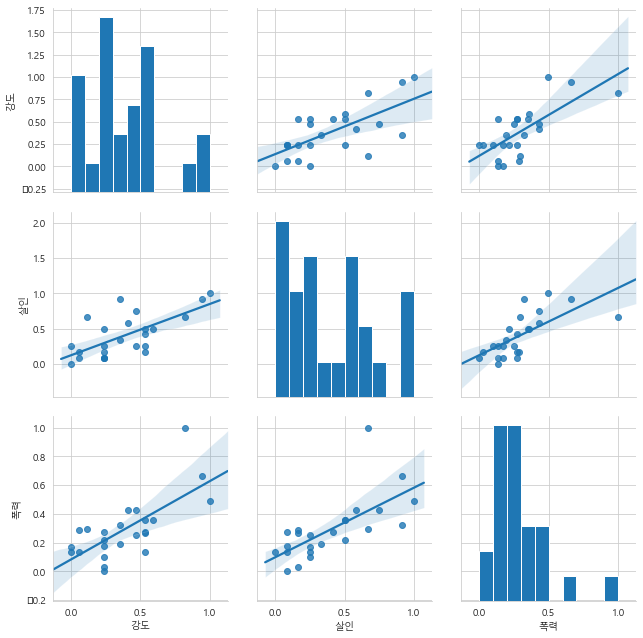

In [47]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', height=3)
plt.show()

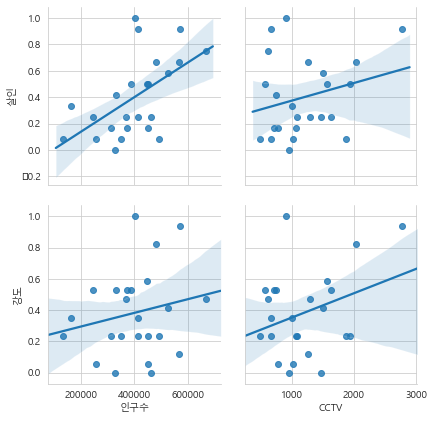

In [48]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], y_vars=["살인", "강도"], kind='reg', size=3)
plt.show()

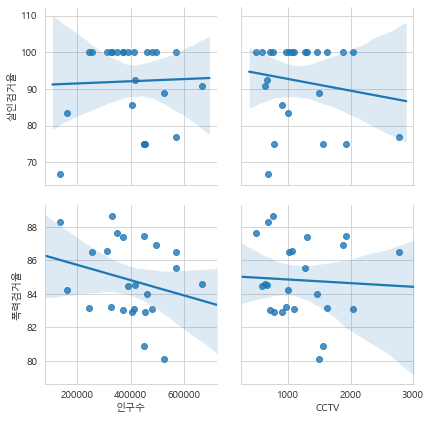

In [49]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인검거율", "폭력검거율"], kind='reg', size=3)
plt.show()

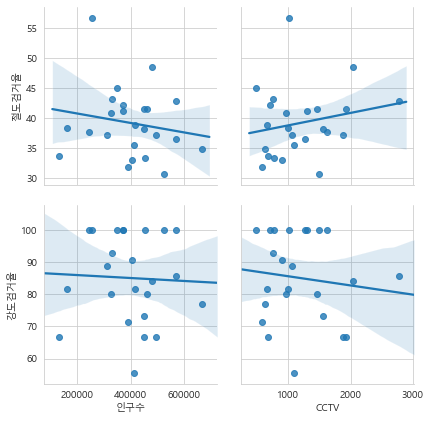

In [50]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["절도검거율", "강도검거율"], kind='reg', size=3)
plt.show()

In [51]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


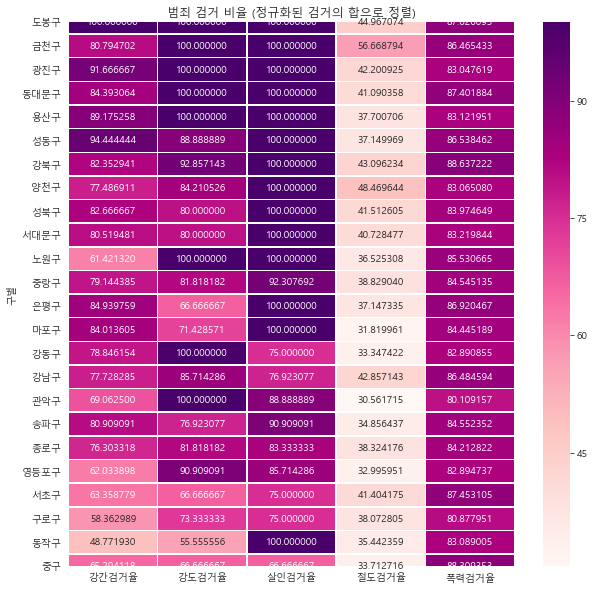

In [52]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

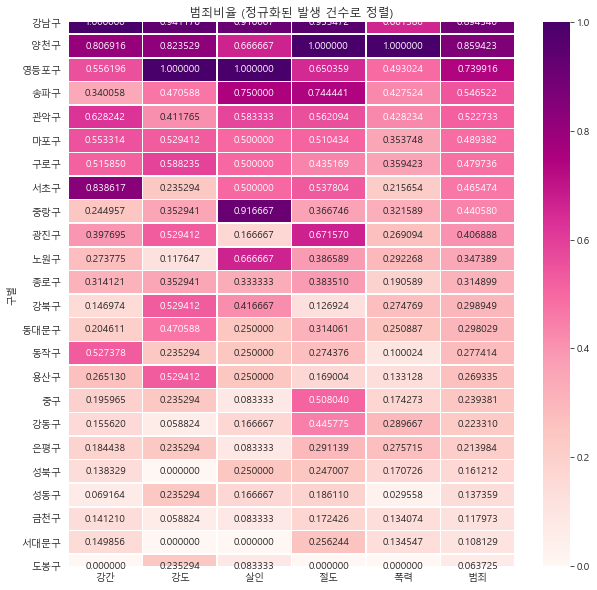

In [53]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [56]:
crime_anal_norm.to_csv('02. crime_in_Seoul_final.csv', sep=',', 
                       encoding='utf-8')

# Folium 

In [57]:
import folium

# 범죄율에 대한 지도 시각화

In [60]:
import json
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [98]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [61]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\user\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [62]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [63]:
tmp_criminal = crime_anal_norm['살인'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [64]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [65]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['검거'],
               columns = [crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

# 경찰서별 검거현황과 구별 범죄발생 현황을 표현하기

In [66]:
#경찰서별 검거현황과 구별 범죄발생 현황을 표현하기
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [67]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], 
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

In [68]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [107]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map